<a href="https://colab.research.google.com/github/4elvis/Descriptive-Statistics-Project/blob/main/Spam_Prediction_Na%C3%AFve_Bayes_Classifier_Week_9%2C_Elvis_Njoroge_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPAM PREDICTION: GAUSSIAN NAIVE BAYES CLASSIFIER**

# **INTRODUCTION**

# **1.1 Defining the Question**

Electronic mail was invented in 1971 with the simple format used today being inaugurated in 1981. Spam email service helps the email service host to differentiate important emails and typically unwanted junk. It also helps an individual identify potential harmful emails. The study is aimed at predicting if a model can classify harmful and spam emails.



# **1.2 Defining the metrics of success**

The problem being investigated falls under the classification category. The Gaussian Naïve Bayes Classifier will be used. An accuracy threshold of above 90% will be preferred for a model to be considered. The recall rate will also be examined between the different training sets to assess a models ability to outperform other strategies

# **1.3 Understanding the Context**

A lot of time is lost by various individuals sorting out important and junk emails. It is therefore necessary that email service providers come up with predictive models that differentiate harmful and spam emails due to the rising number of cybercrimes.

# **1.4 Recording the Experimental design**

The predictive process will use these steps: Load the dataset, Conduct Exploratory Data Analysis and Visualization, Build the Gaussian Naïve Bayes Classifier, Conduct optimization techniques, challenge the solution and make recommendations.

# **1.5 Data Relevance**

Data was collected and stored in the Machine Learning Repository after a series of approved field work. [link text](https://https://archive.ics.uci.edu/ml/datasets/Spambase)


#   2.1 Loading the Dataset

In [ ]:
#Importing the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import math

In [ ]:
#loading the spambase data
spam = pd.read_csv('spambase.data')
spam.head(4)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
#Viweing the tail of the spam data set
spam.tail(5)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [ ]:
#Viweing the datatypes of the spam dataset
spam.dtypes

0         float64
0.64      float64
0.64.1    float64
0.1       float64
0.32      float64
0.2       float64
0.3       float64
0.4       float64
0.5       float64
0.6       float64
0.7       float64
0.64.2    float64
0.8       float64
0.9       float64
0.10      float64
0.32.1    float64
0.11      float64
1.29      float64
1.93      float64
0.12      float64
0.96      float64
0.13      float64
0.14      float64
0.15      float64
0.16      float64
0.17      float64
0.18      float64
0.19      float64
0.20      float64
0.21      float64
0.22      float64
0.23      float64
0.24      float64
0.25      float64
0.26      float64
0.27      float64
0.28      float64
0.29      float64
0.30      float64
0.31      float64
0.32.2    float64
0.33      float64
0.34      float64
0.35      float64
0.36      float64
0.37      float64
0.38      float64
0.39      float64
0.40      float64
0.41      float64
0.42      float64
0.778     float64
0.43      float64
0.44      float64
3.756     float64
61        

In [ ]:
#Viewing the shape of the spam dataset
spam.shape

(4600, 58)

The data has 4600 entries and 58 columns

In [ ]:
#Viewing the spam of the columns
spam.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

The columns have to be renamed to help conduct an extensive analysis of the data

# **2.2 Tidying the dataset**

In [ ]:
# Creating column names for the spam base dataset 2
# Since it has no columns names as its heading

values = np.random.random_integers(1, 60, 58)

columns = {}
column_base_name = 'Column'

for i, value in enumerate(values):
    columns['{:s}{:d}'.format(column_base_name, i)] = value

spam.columns = columns
print(spam.columns)

Index(['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'Column22', 'Column23',
       'Column24', 'Column25', 'Column26', 'Column27', 'Column28', 'Column29',
       'Column30', 'Column31', 'Column32', 'Column33', 'Column34', 'Column35',
       'Column36', 'Column37', 'Column38', 'Column39', 'Column40', 'Column41',
       'Column42', 'Column43', 'Column44', 'Column45', 'Column46', 'Column47',
       'Column48', 'Column49', 'Column50', 'Column51', 'Column52', 'Column53',
       'Column54', 'Column55', 'Column56', 'Column57'],
      dtype='object')


In [ ]:
#Checking if the data has missing values
spam.isnull().sum().sum()

0

In [ ]:
#Check for duplicate values in the training dataset
spam.duplicated().sum()

391

The spam dataset contains 391 duplicates

In [ ]:
#Checking for unique values in the dataset
spam.nunique()

Column0      142
Column1      171
Column2      214
Column3       43
Column4      255
Column5      141
Column6      173
Column7      170
Column8      144
Column9      245
Column10     113
Column11     316
Column12     158
Column13     133
Column14     118
Column15     253
Column16     197
Column17     229
Column18     575
Column19     148
Column20     401
Column21      99
Column22     164
Column23     143
Column24     395
Column25     281
Column26     240
Column27     200
Column28     156
Column29     179
Column30     128
Column31     106
Column32     184
Column33     110
Column34     177
Column35     159
Column36     188
Column37      53
Column38     163
Column39     125
Column40     108
Column41     186
Column42     136
Column43     160
Column44     230
Column45     227
Column46      38
Column47     106
Column48     313
Column49     641
Column50     225
Column51     963
Column52     504
Column53     316
Column54    2160
Column55     271
Column56     919
Column57       2
dtype: int64

Data Cleaning

In [ ]:
#dealing with the dublicates
spam.drop_duplicates(subset=None, keep='first', inplace= False)

,Column0,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37,Column38,Column39,Column40,Column41,Column42,Column43,Column44,Column45,Column46,Column47,Column48,Column49,Column50,Column51,Column52,Column53,Column54,Column55,Column56,Column57
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


A change in the number of rows suggest that the change has been made 

In [ ]:
#checking for any anomalies of the Train dataset
col = ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'Column22', 'Column23',
       'Column24', 'Column25', 'Column26', 'Column27', 'Column28', 'Column29',
       'Column30', 'Column31', 'Column32', 'Column33', 'Column34', 'Column35',
       'Column36', 'Column37', 'Column38', 'Column39', 'Column40', 'Column41',
       'Column42', 'Column43', 'Column44', 'Column45', 'Column46', 'Column47',
       'Column48', 'Column49', 'Column50', 'Column51', 'Column52', 'Column53',
       'Column54', 'Column55', 'Column56', 'Column57']
for i in col:

  u = spam[i].unique()
  print('Unique values of ', i , 'is' , u)

Unique values of  Column0 is [0.21 0.06 0.   0.15 0.05 1.17 0.3  0.18 0.49 0.46 0.73 0.23 0.12 0.66
 0.75 0.47 0.59 1.24 0.5  0.16 0.41 1.   0.36 0.39 0.67 0.42 0.14 0.62
 0.52 0.17 0.44 0.34 0.43 2.12 0.54 0.53 0.51 0.45 0.22 0.07 1.03 0.26
 0.19 0.84 0.08 0.48 0.8  0.58 0.25 0.4  0.1  1.63 0.35 0.64 0.63 0.65
 0.2  0.6  0.76 0.11 1.05 0.29 0.33 0.27 0.31 0.09 0.32 0.57 0.9  0.28
 0.56 2.43 1.18 0.13 2.32 0.68 0.79 1.26 0.89 0.7  0.82 0.87 0.24 0.95
 0.93 0.98 1.01 0.72 0.71 1.23 2.35 0.78 0.38 0.74 1.36 1.47 0.69 1.06
 1.61 1.04 0.37 1.19 1.44 0.61 0.86 0.77 0.99 0.85 4.54 0.96 0.02 1.14
 0.81 1.02 1.11 2.77 0.01 2.   0.04 0.03 1.09 0.97 1.16 2.27 1.07 3.94
 1.75 3.03 0.83 0.55 1.12 2.85 3.84 1.31 1.08 1.49 4.   1.39 4.34 1.42
 1.88 0.88]
Unique values of  Column1 is [2.800e-01 0.000e+00 1.200e-01 6.900e-01 4.200e-01 6.300e-01 7.000e-02
 6.800e-01 4.800e-01 4.100e-01 4.500e-01 3.000e-01 4.600e-01 1.920e+00
 3.600e-01 1.260e+00 5.900e-01 3.400e-01 2.400e-01 5.300e-01 4.400e-01
 9.400e

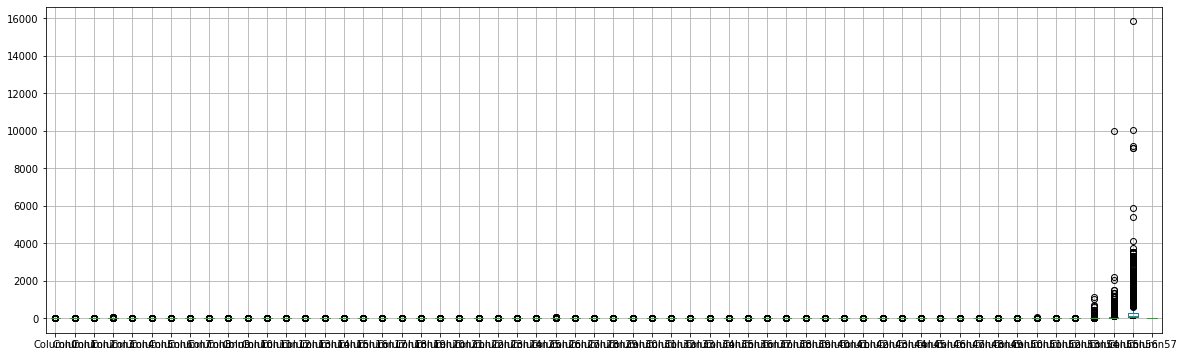

In [ ]:
#checking for outliers
spam1= spam
plt.figure(figsize = (20, 6))
spam1.boxplot()
plt.show()

The spam dataset has too many varibles containing less information. This makes it hard to drop the columns 

# **3.0 EXPLORATORY DATA ANALYSIS**

The data contains less information on numerous columns making it hard to either drop or assess the relationship. The most unique is Column 57 which will be used as our target variable

#  3.1 Univariate Data Analysis

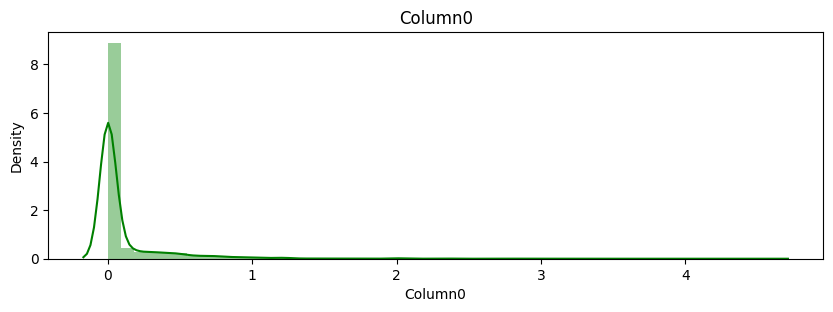

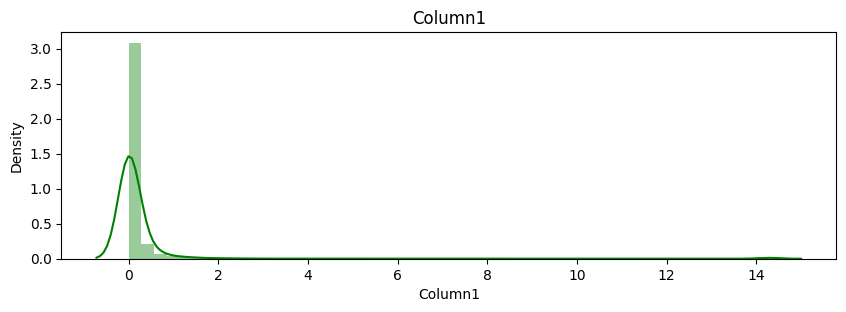

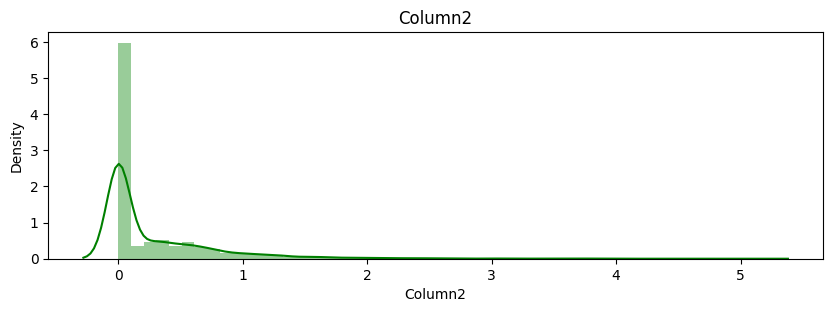

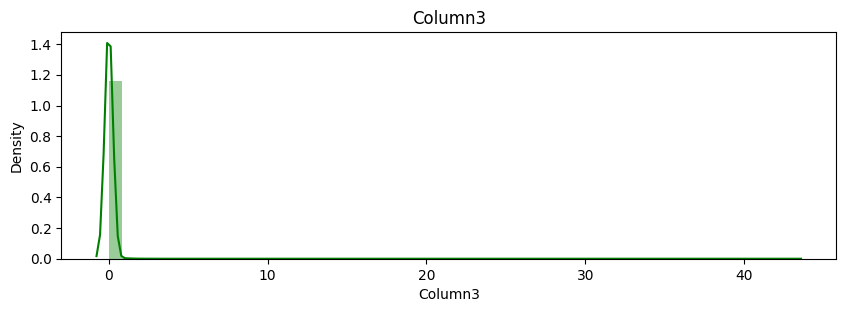

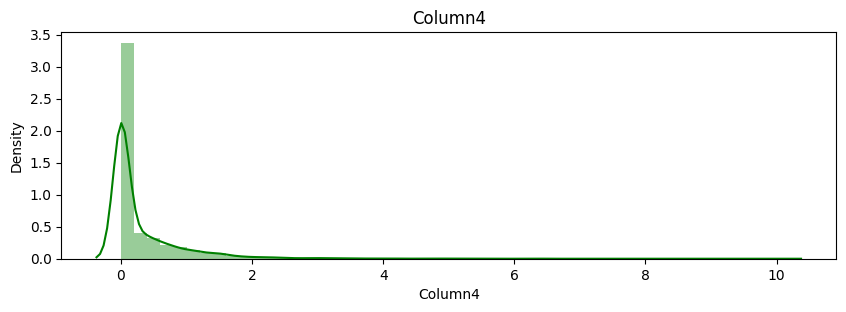

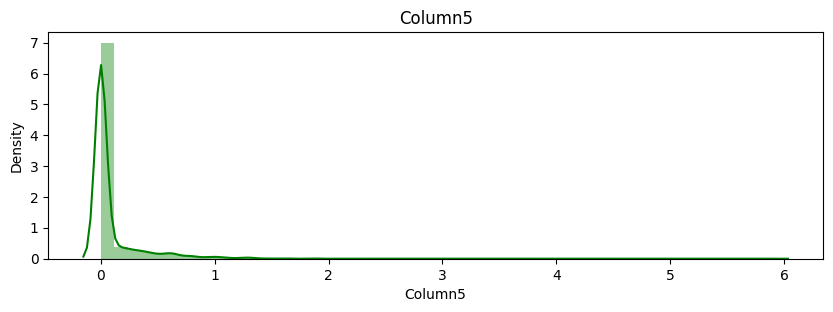

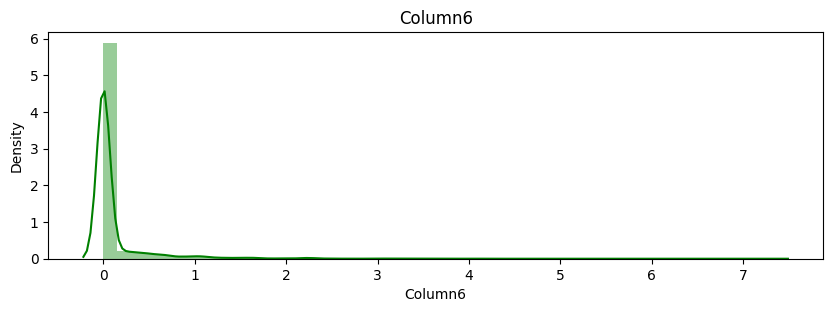

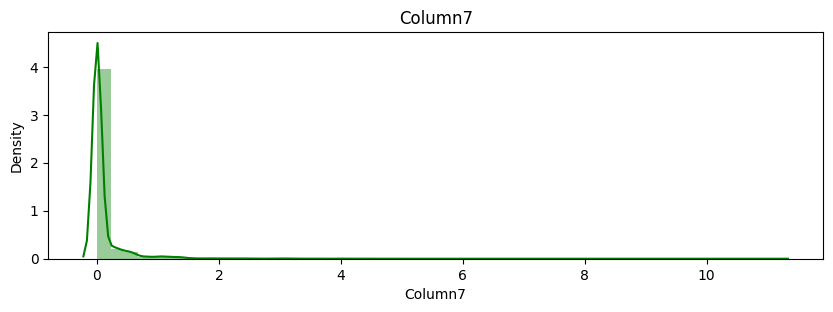

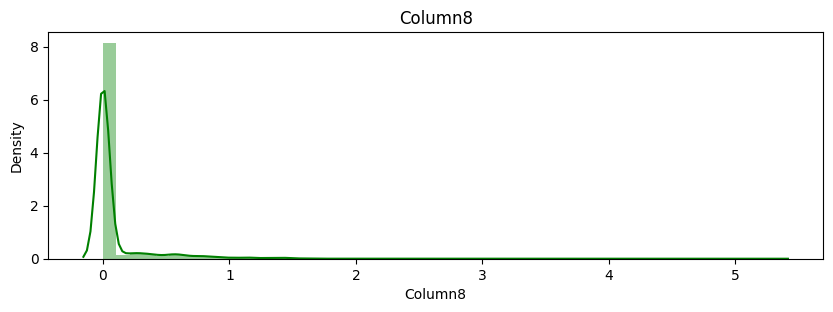

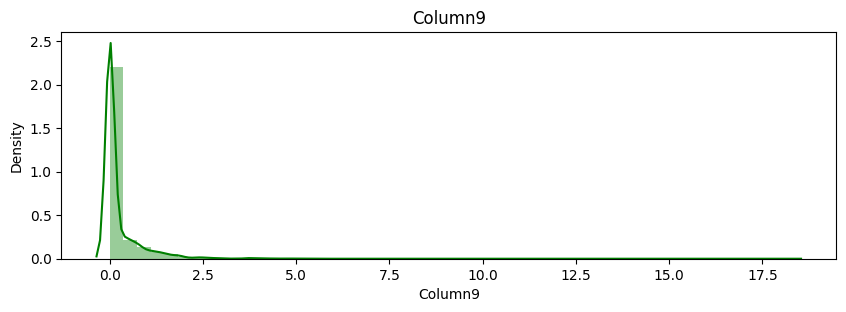

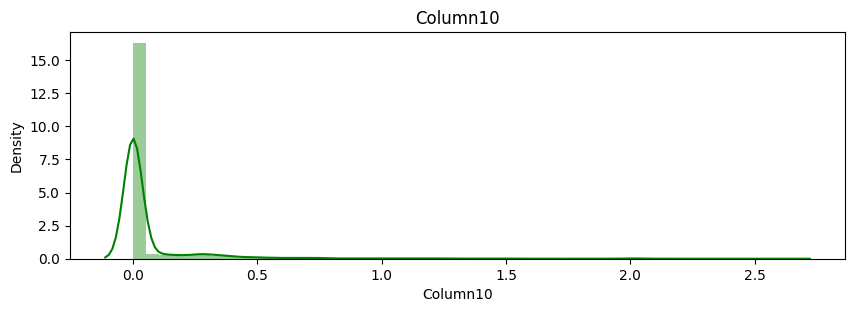

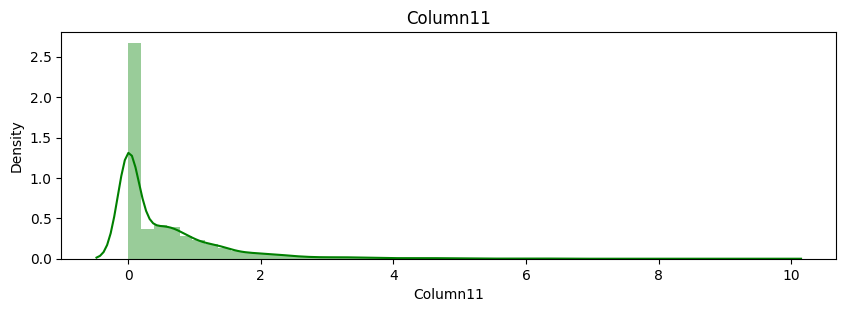

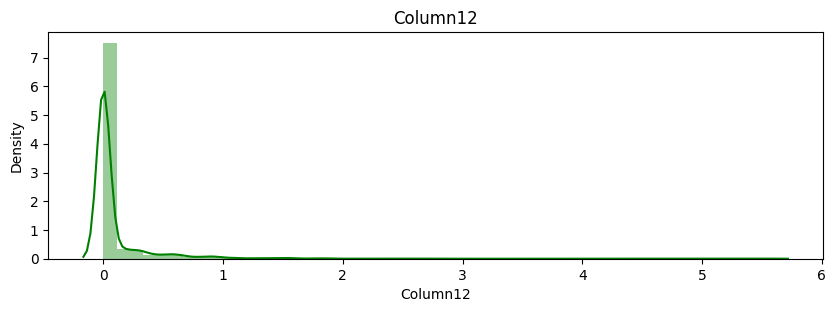

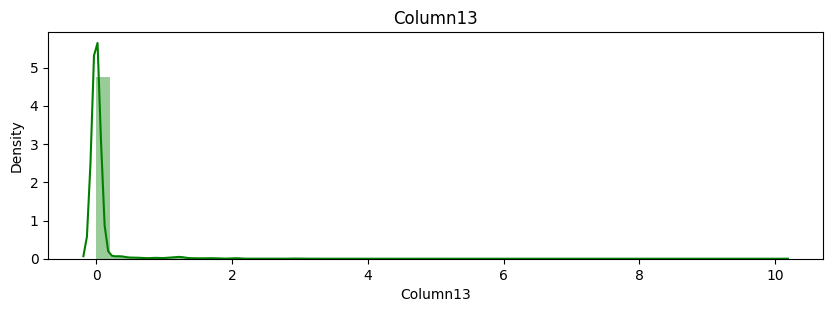

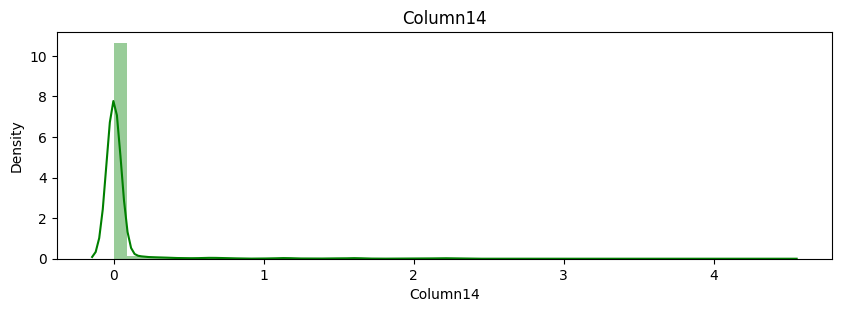

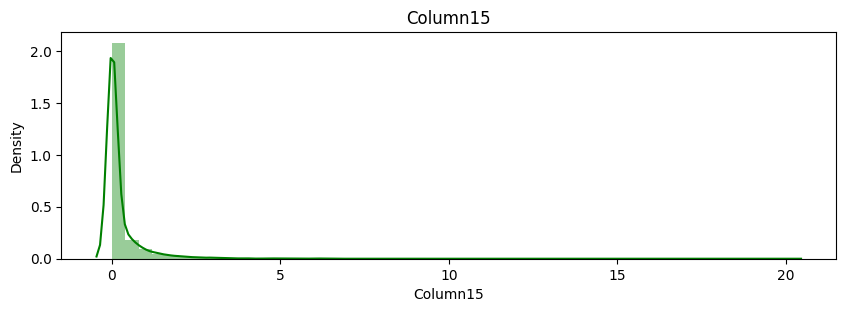

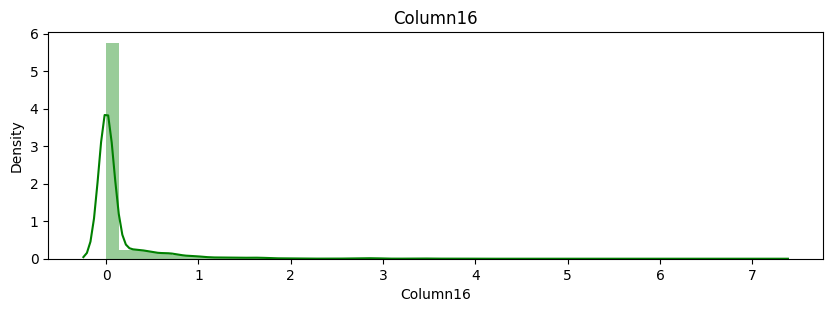

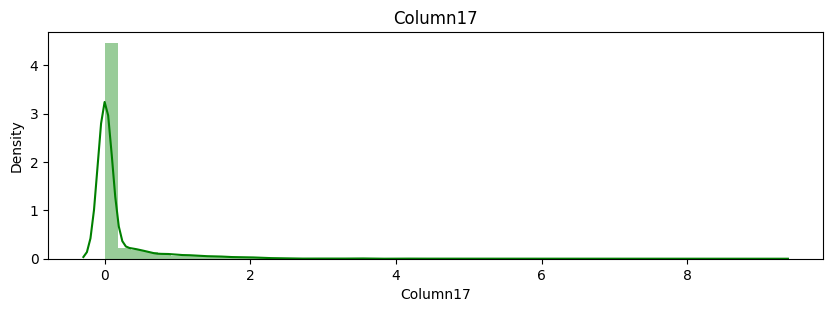

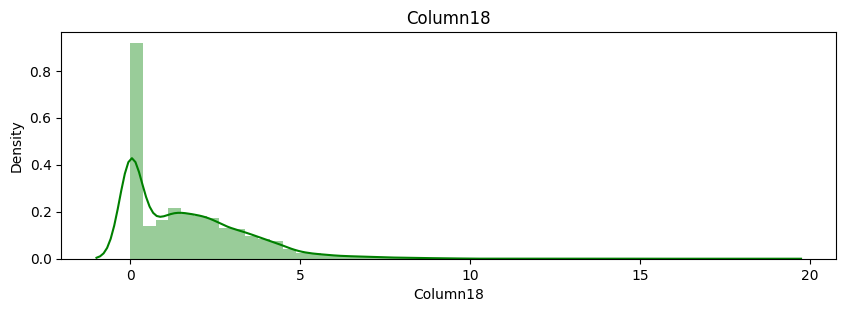

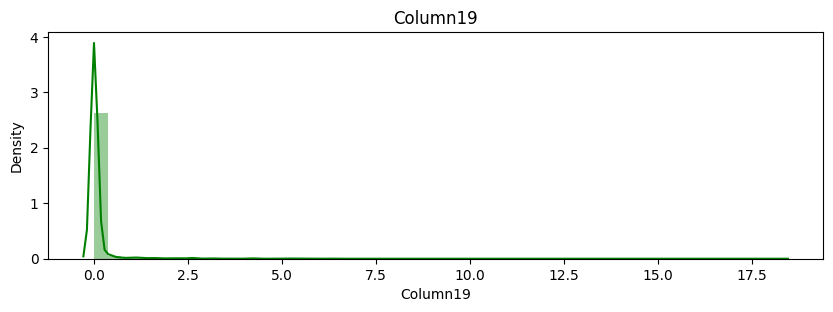

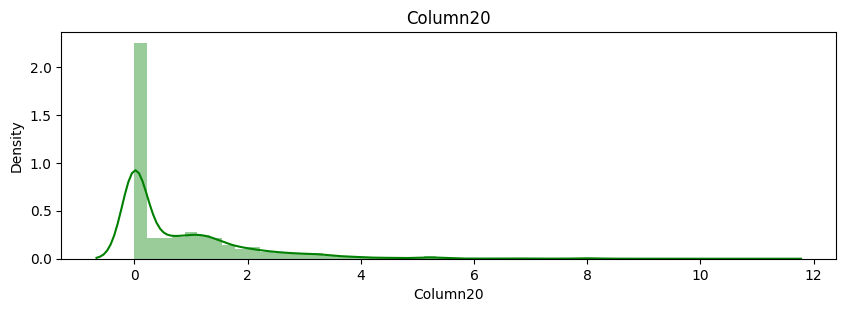

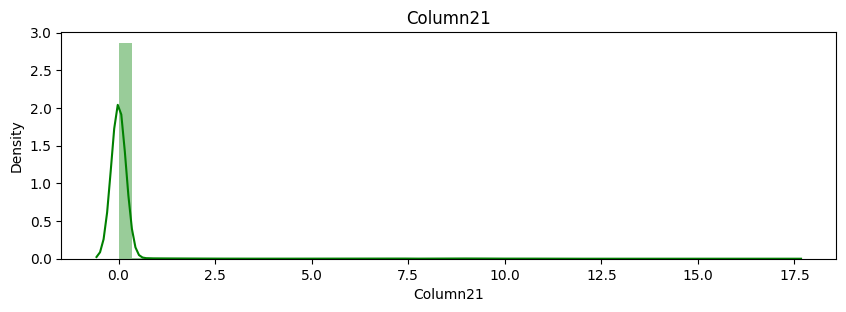

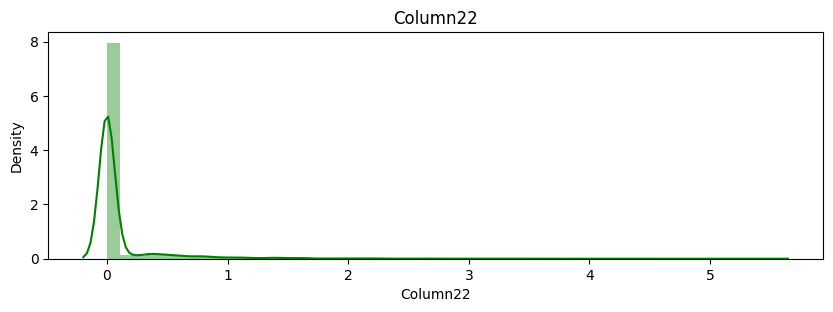

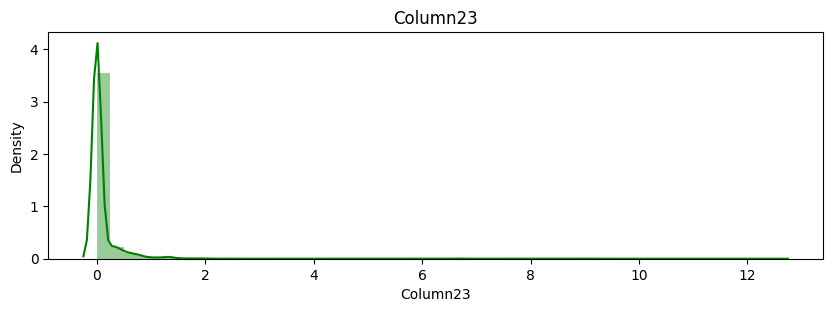

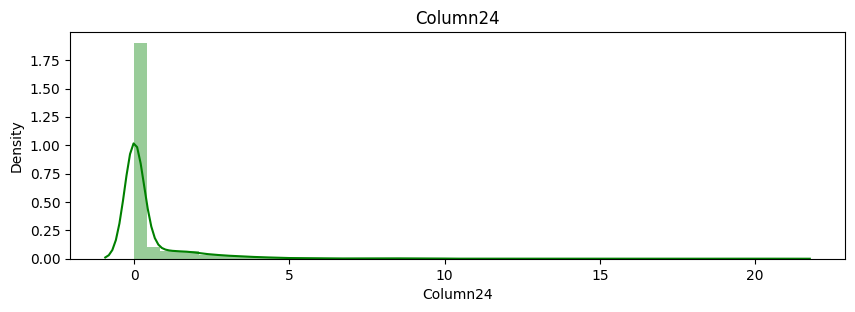

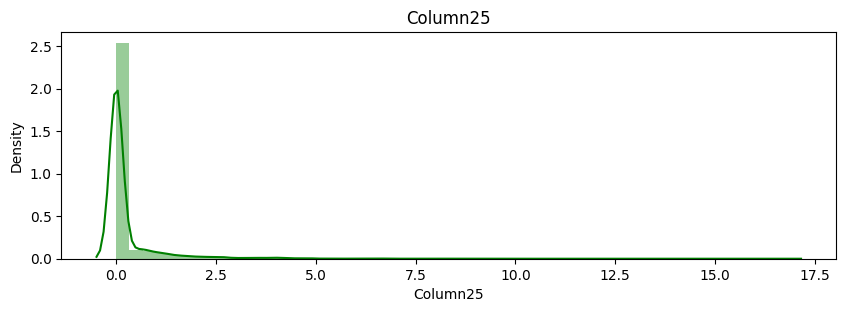

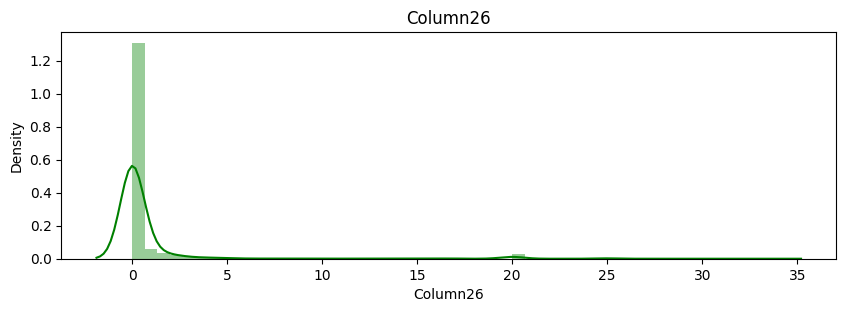

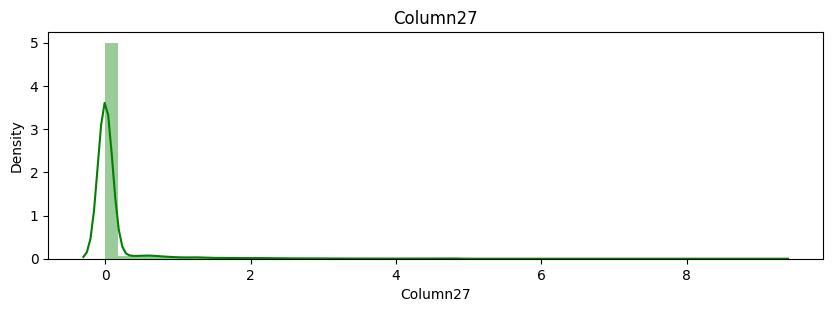

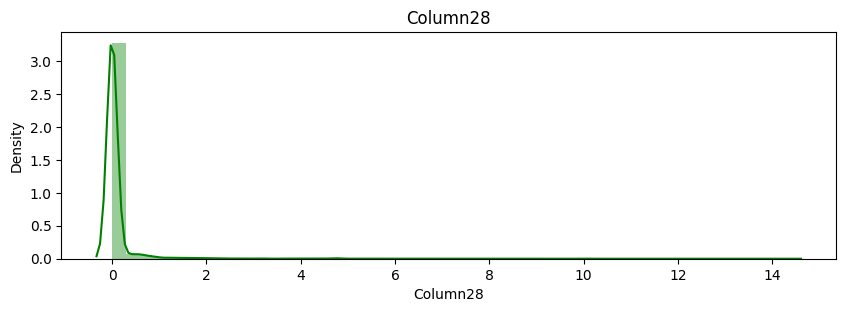

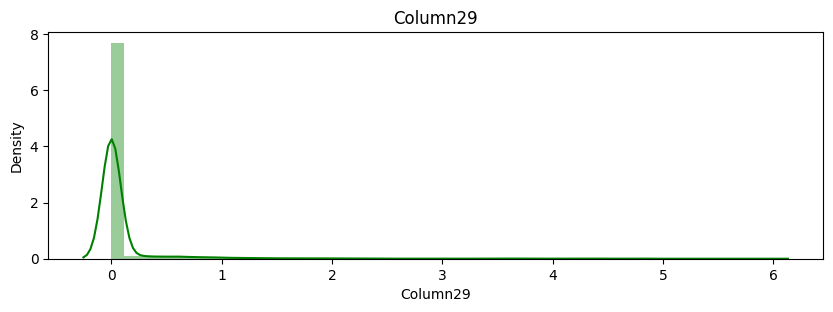

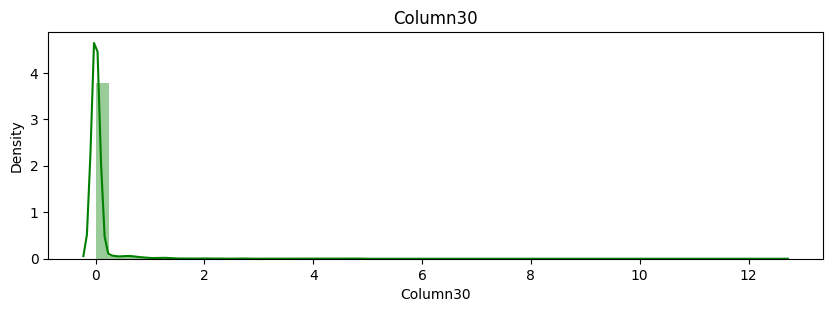

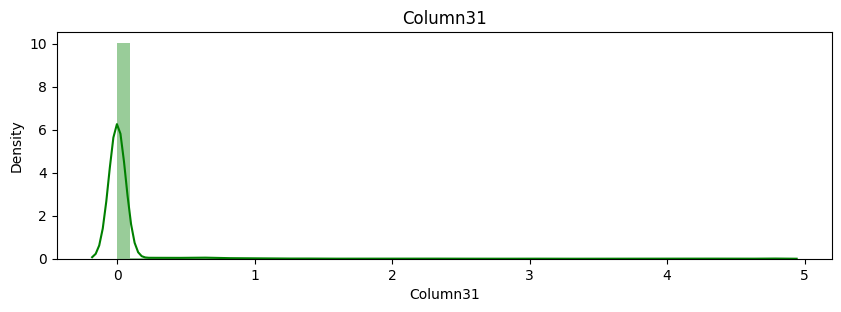

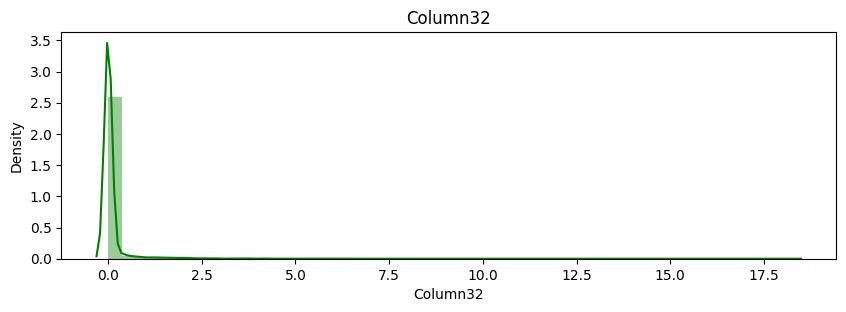

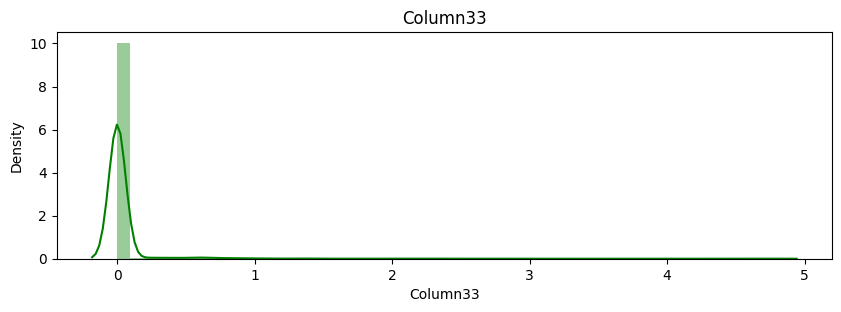

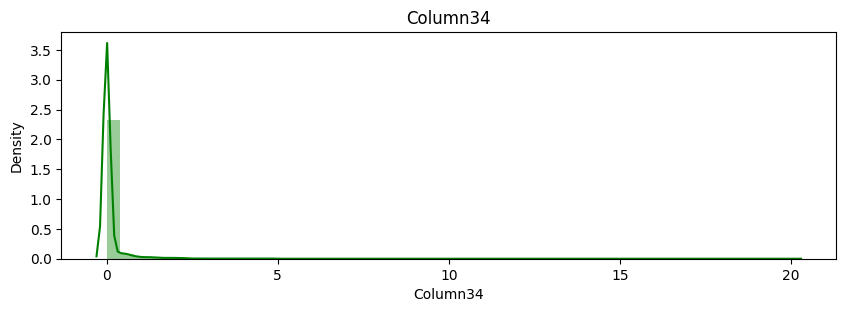

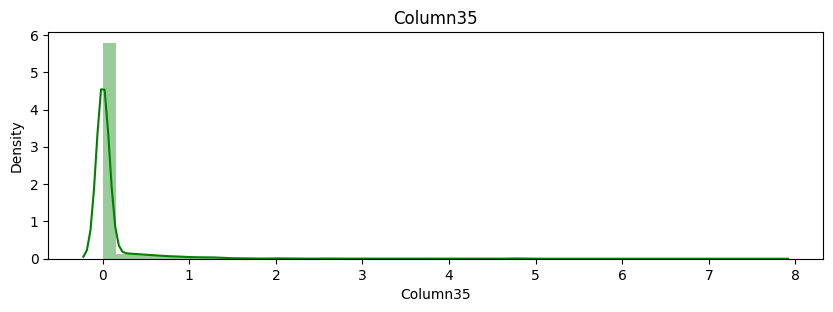

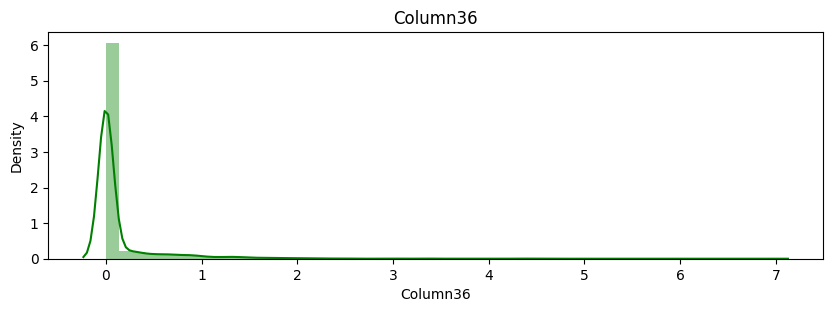

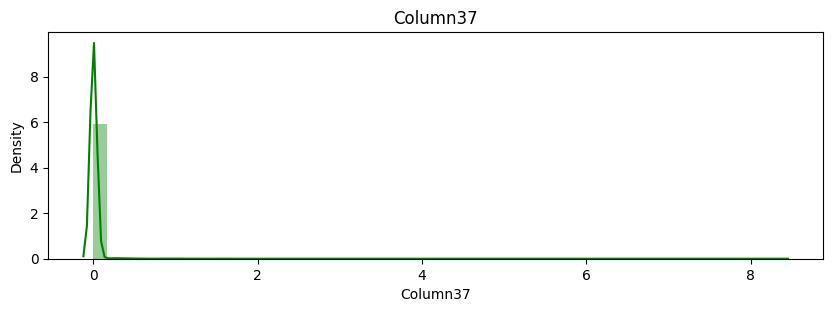

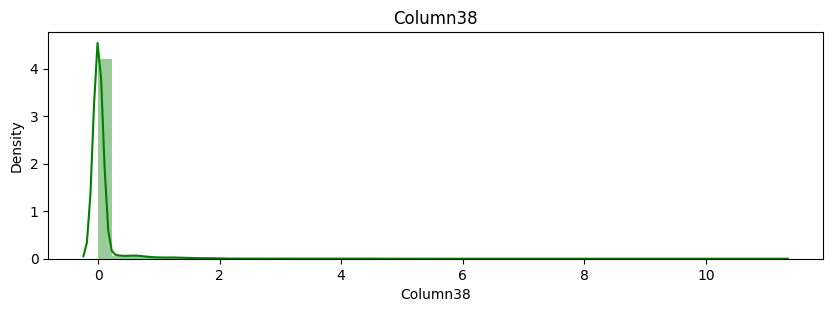

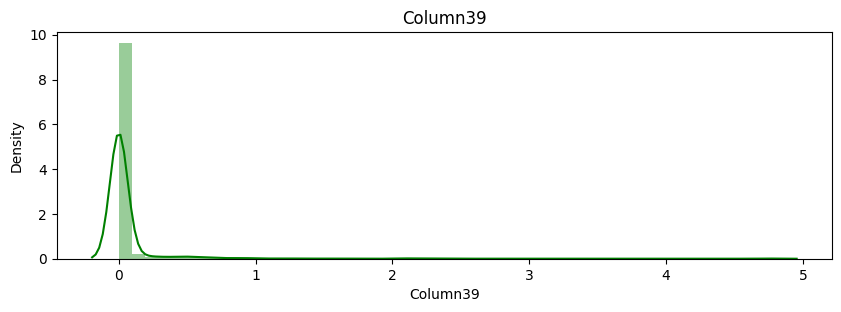

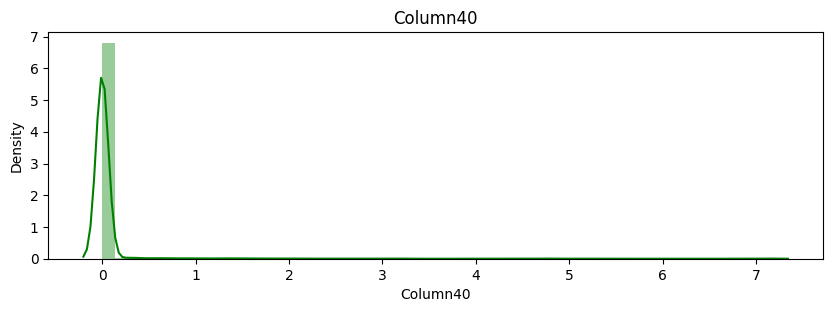

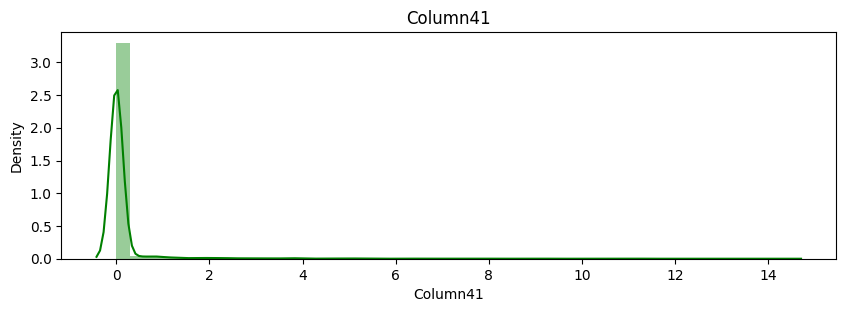

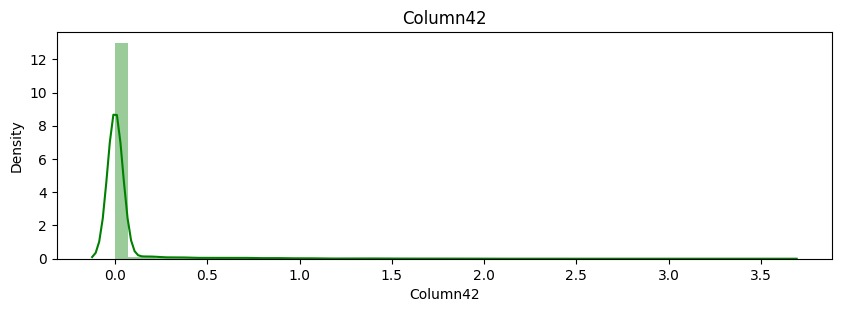

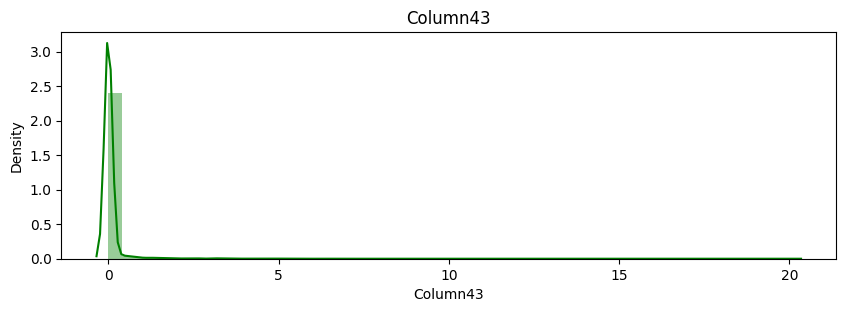

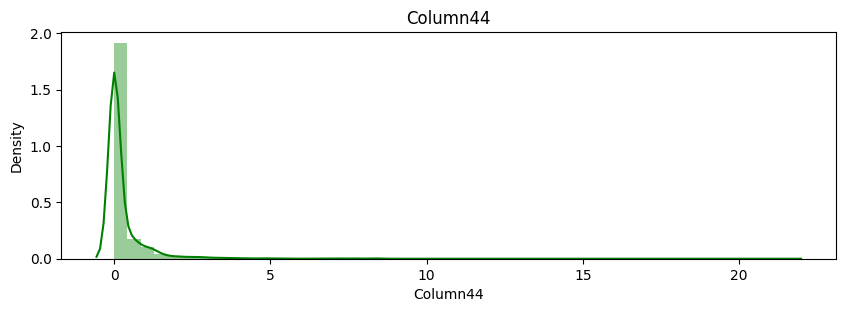

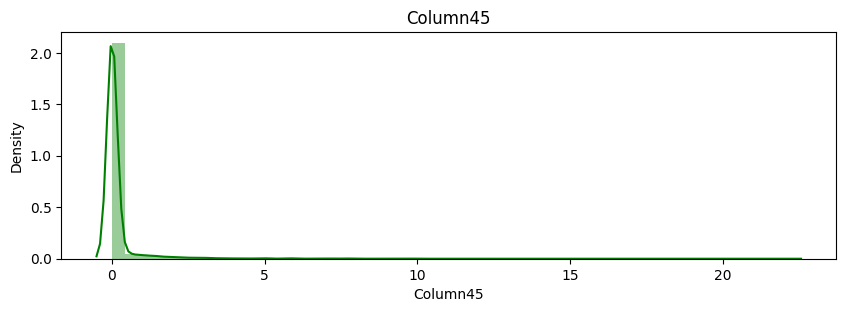

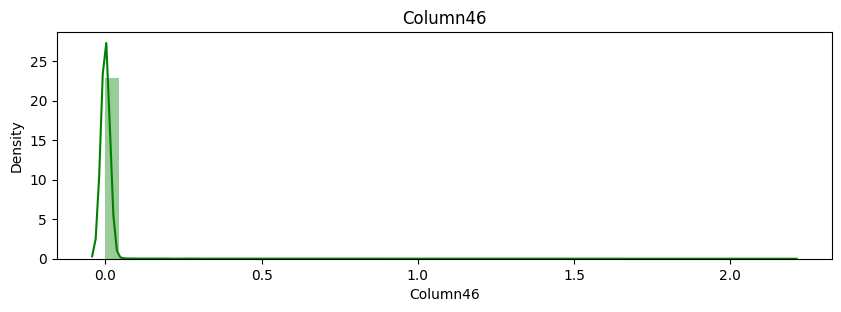

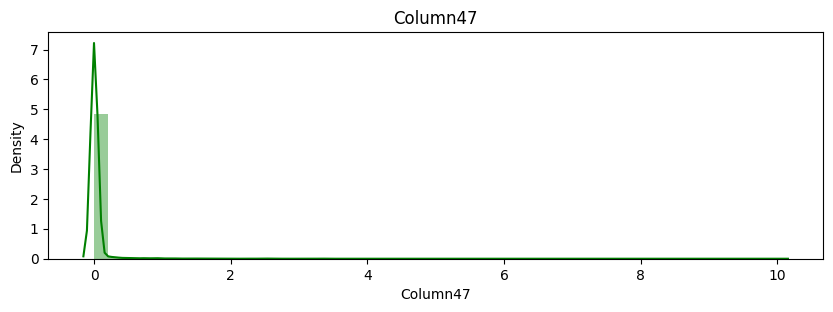

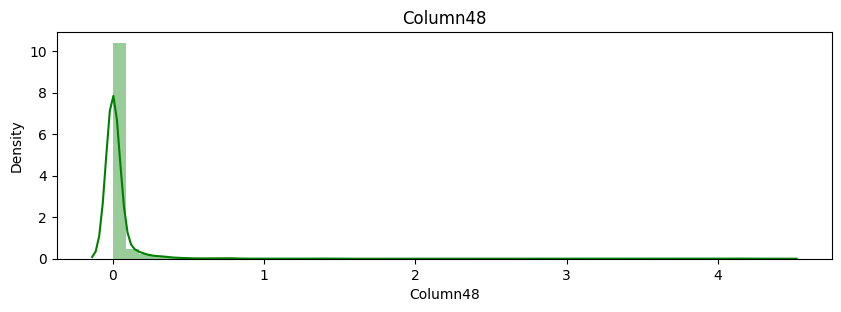

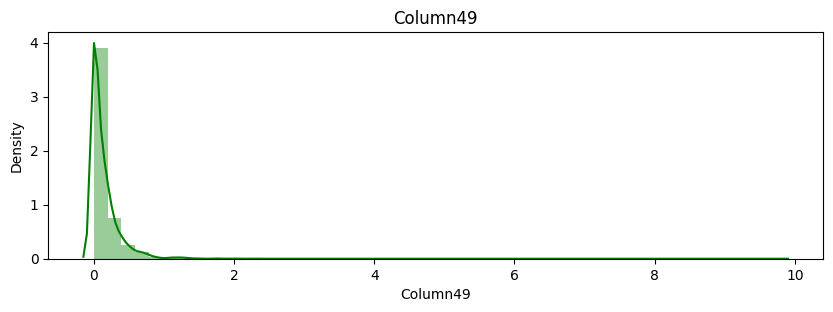

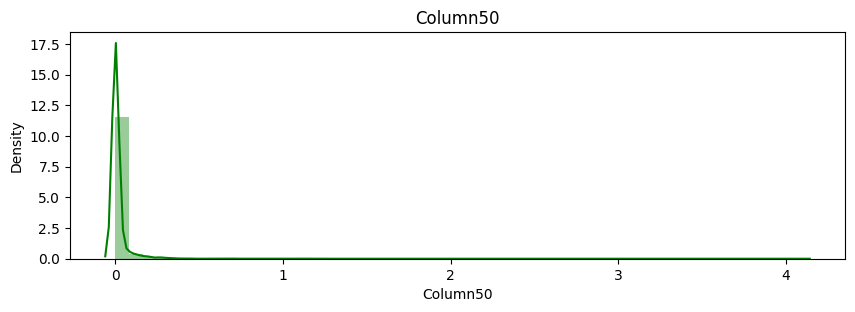

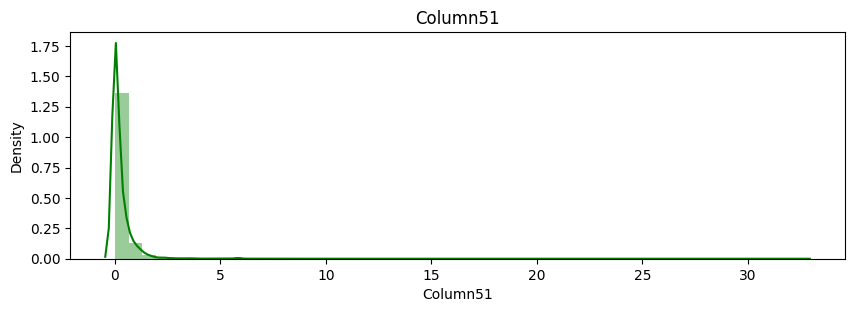

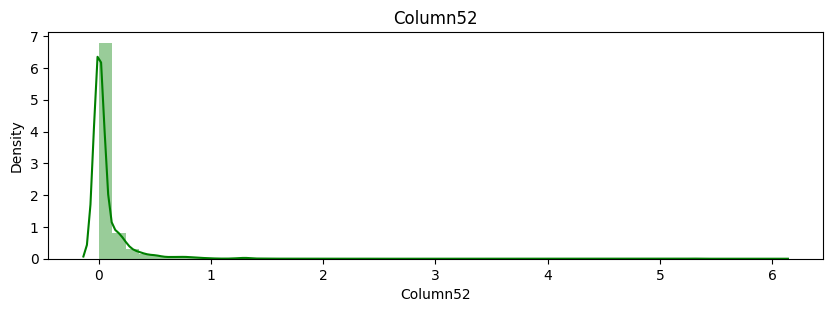

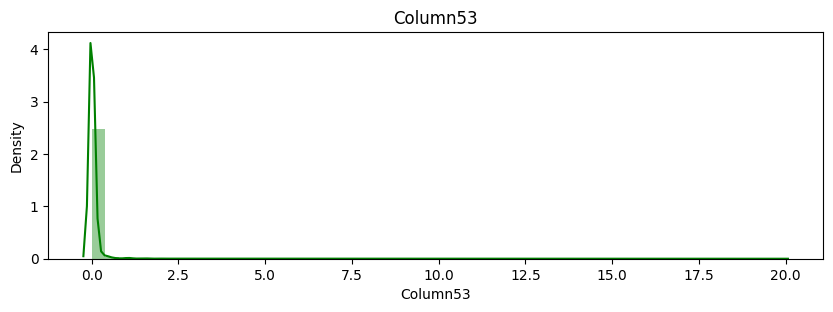

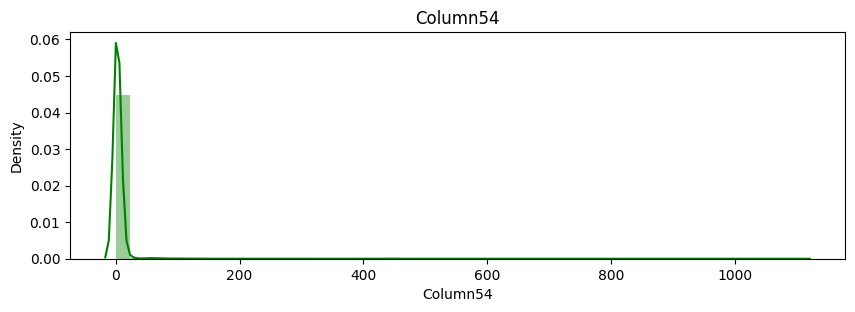

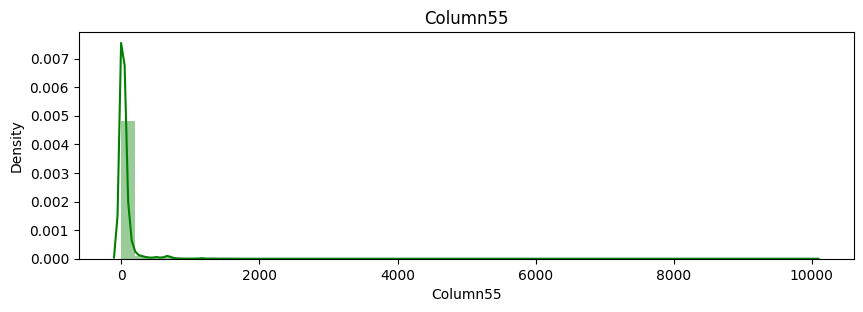

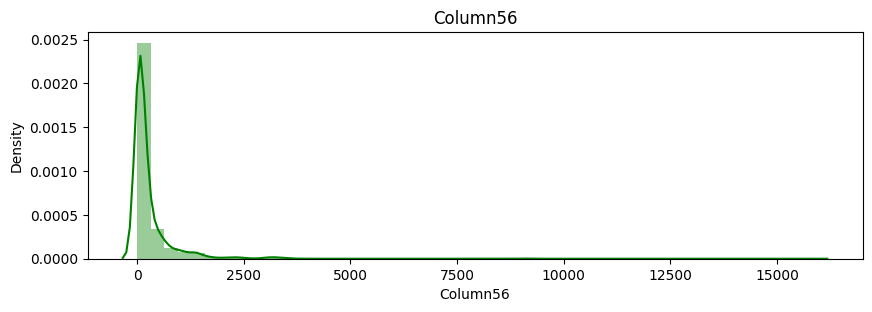

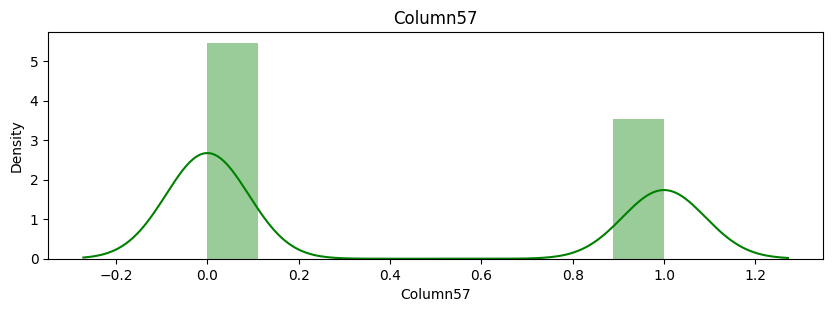

In [ ]:
#Histogram of the numerical values
cols = ['Column0', 'Column1', 'Column2', 'Column3', 'Column4', 'Column5',
       'Column6', 'Column7', 'Column8', 'Column9', 'Column10', 'Column11',
       'Column12', 'Column13', 'Column14', 'Column15', 'Column16', 'Column17',
       'Column18', 'Column19', 'Column20', 'Column21', 'Column22', 'Column23',
       'Column24', 'Column25', 'Column26', 'Column27', 'Column28', 'Column29',
       'Column30', 'Column31', 'Column32', 'Column33', 'Column34', 'Column35',
       'Column36', 'Column37', 'Column38', 'Column39', 'Column40', 'Column41',
       'Column42', 'Column43', 'Column44', 'Column45', 'Column46', 'Column47',
       'Column48', 'Column49', 'Column50', 'Column51', 'Column52', 'Column53',
       'Column54', 'Column55', 'Column56', 'Column57']

for i in cols:
  plt.figure(figsize = (10,3), dpi=100)
  sns.distplot(spam[i], kde = True, color = 'green')
  plt.title(i, color = 'Black')
  plt.show()

Most of the columns have a positively skewed data distribution

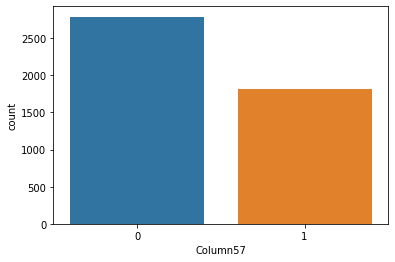

In [ ]:
# Plotting the count of the emails that were spammed and not spammed

sns.countplot(spam['Column57'])

The number of emails not spammed is slightly higher than those not spammed

In [ ]:
# The Kurtosis of numerical columns
spam['Column57'].kurt()

-1.8121054055131676

The negative kurtosis suggest that the data is light tailed

In [ ]:
# The Kurtosis of numerical columns
spam['Column57'].mode()

0    0
dtype: int64

In [ ]:
#A correlation matrix of the numerical values
corr = df_t1.corr()
fig, ax = plt.subplots(figsize=(18, 13))
sns.heatmap(corr, annot=True)

# **4.0 Model Building**


# **4.1 Naive Bayes Classifier**

The nature of the data suggests that the data contains continous data variables. I opted to use Gaussian Naive Bayes classifier after subjecting the data through the LDA reduction technique

In [64]:
# Create correlation matrix
corr_matrix = spam.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [65]:

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop the highly correlated features 
spam.drop(spam[to_drop], axis=1, inplace = True)

In [66]:
# checking if there are any correlated features
to_drop

['Column33']

In [67]:
# confirming the changes
spam.shape


(4600, 57)

# **4.2 Gaussian Naive Bayes Classifier**

In [24]:
# Load libraries and datasets to be used in this example
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

**Conducting the 80-20 split**

In [26]:
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

In [27]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [28]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
# ida = LDA(n_components = 1)

from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [32]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [35]:
#Evaluating the GNB algorith
from sklearn.metrics import classification_report, confusion_matrix
# The final step is to make predictions on our test data
# ---
# 
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[513  25]
 [ 64 318]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       538
           1       0.93      0.83      0.88       382

    accuracy                           0.90       920
   macro avg       0.91      0.89      0.90       920
weighted avg       0.90      0.90      0.90       920



The model had a 95% recall rate.
The confusion matrix: the first row predicted 513 emails correctly classified as spam emails and hence were true positives, 25 emails were wrongly classified as spam emails and hence were false positives. The second row: 64 emails were wrongly classified as spam emails and hence were false positives whereas 318 emails were correctly classified as spam emails and hence true positives

In [36]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.9032608695652173

The 80-20 dataset had 90% accuracy.

**Testing the 70-30 model**

In [37]:
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

In [38]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

In [40]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# ida = LDA(n_components = 1)


lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [42]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [43]:
#Evaluating the GNB algorith
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[789  33]
 [100 458]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       822
           1       0.93      0.82      0.87       558

    accuracy                           0.90      1380
   macro avg       0.91      0.89      0.90      1380
weighted avg       0.91      0.90      0.90      1380



The recall rate yilded a 96% rate. The confusion matrix interpretation: the first row- predicted 789 emails as correctly classified emails and hence true positive whereas it predicted 33 emails were wrongly classified as spam and hence false positive. The second row classified 100 emails wrongly and hence false positives whereas it classified 458 emails correctly under spam emails and hence true positives

In [44]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.9036231884057971

The second test split yilded a 90.36% accuracy, slightly higher than the previous model: 80-40(90.32%)

**Prediting the 60-40 model**

In [46]:
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

In [47]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [48]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# ida = LDA(n_components = 1)


lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [51]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [52]:
#Evaluating the GNB algorith
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1060   37]
 [ 132  611]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1097
           1       0.94      0.82      0.88       743

    accuracy                           0.91      1840
   macro avg       0.92      0.89      0.90      1840
weighted avg       0.91      0.91      0.91      1840



The recall rate is 97%. 

Confusion matrix interpretation: The first row- 1069 emails were correctly classified as spam emails and hence true positives whereas 37 emails were wrongly classified as spam emails and hence false postives.The scond row: 132 emails were wrongly classified as spam emails and hence considered to be false positives whereas 611 emails were correctly classified as spam emails and hence considered to be true positives

In [53]:
#Predicting accuracy score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

accuracy_score (y_test, y_pred)

0.9081521739130435

The 60-40 split model predicted slightly higher than the other two models yielding a 90.8%

**Recommendations**

Increasing the test size yileds more accurate results

# **5.0  Challenging the Solution**

We use Support Vector analysis to challenge the solution yeilded by 60-40 test model

In [54]:
#Importing libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
# Splitting the data

X = spam.iloc[:, 0:-1]
y = spam.iloc[:,-1]

In [56]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

In [57]:
#Perfoming future scalling on the features under investigation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# ida = LDA(n_components = 1)


lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

Thw nature of the data makes me consider using the linear kernel

In [62]:
from sklearn.svm import SVC
# Building the model 
polyclassifier1 = SVC(kernel='linear',degree=15,gamma='auto')
# Training the model using the training set
polyclassifier1.fit(X_train, y_train)
poly_pred1 = polyclassifier1.predict(X_test)
accuracy_score(y_test, poly_pred1)




0.9206521739130434

The accuracy of the model improved significantly scoring 92%.

In [60]:
#Evaluating the GNB algorith
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1060   37]
 [ 132  611]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1097
           1       0.94      0.82      0.88       743

    accuracy                           0.91      1840
   macro avg       0.92      0.89      0.90      1840
weighted avg       0.91      0.91      0.91      1840



The Gausian Naives Model(60-40)test split is therefore the best model

Recommendations

Increasing the test size will yield better prediction results

# **6.0 Follow Up Questions**

# **6.1 Did we have the right data?**

yes

# **6.2 )D we need an extra set of data?**

it is recommended that the columns be labaled and reduced to help predict accurately next time

# **6.3 )Did we achieve our objective?**

The best model yielded a 90.8% accuracy.